In [78]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# One-hot encoding
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values(features and labels)
X=insurance_one_hot.drop('charges',axis=1)
y=insurance_one_hot['charges']

In [ ]:
# Create training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Create deep neural network using following steps:
1. Create a Sequential model consisting information about the no. of neurons in hidden layers and output layer
2. Compile the model setting the optimizer to update the weights and loss function
3. Fit the model for the training sets for a certain epochs

In [90]:
tf.random.set_seed(42)
# 1. Create a model
insurance_model=tf.keras.Sequential([
  # Hidden Layer consisting of 100 neurons                                
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  # Output layer of 1 neuron
  tf.keras.layers.Dense(1)   
  # N.B: We don't need to specify input_shape as it can be automatically handeled by keras                           
])

# 2.Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

# 3. Fit the model
history=insurance_model.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13198.9180 - mae: 13198.9180
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12462.3027 - mae: 12462.3027
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 10410.9590 - mae: 10410.9590
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7844.8486 - mae: 7844.8486
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.5967 - mae: 7429.5967
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7382.6699 - mae: 7382.6699
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7332.0708 - mae: 7332.0708
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7292.1245 - mae: 7292.1245
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7250.3975 - mae: 7250.3975
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7210.2705 - mae: 721

# Model summary

In [91]:
insurance_model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 100)               1200      
_________________________________________________________________
dense_135 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


# Evalute the model for the test set

In [92]:
# Evaluate the model on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.1052 - mae: 3161.1052


[3161.105224609375, 3161.105224609375]

# Visualizing the training loss curve

Text(0, 0.5, 'Loss')

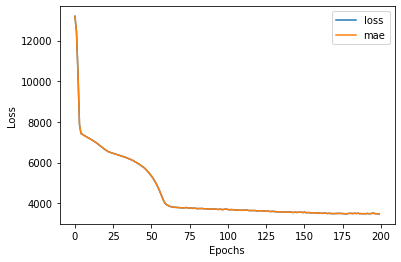

In [93]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

> **Question**: How long should we train for?
TensorFlow has a solution! it's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component. We can add to our model to stop training once it stops improving a certain metric.